In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
#reading the csv in drive
statistical_features=pd.read_csv('/content/drive/MyDrive/W1/statistical_features.csv')
concatenated_df_statistical=pd.read_csv('/content/drive/MyDrive/W1/concatenated_df_statistical.csv')

In [ ]:
#selecting statistical features based on PCC
num1,num2,num3 = list(),list(),list()
from scipy.stats import pearsonr

for i in concatenated_df_statistical.columns:
    X=concatenated_df_statistical['{}'.format(i)].astype(float)
    y=concatenated_df_statistical['Wear'].astype(float)

    correlation,pvalue=pearsonr(X,y)

    num3.append(pvalue)
    num1.append(i)
    num2.append(correlation)

correlation_tables = pd.DataFrame({'Feature':num1,'Correlation':num2,'P-value':num3}).sort_values('Correlation',ascending=False)
correlation_tables

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature,Correlation,P-value
288,Wear,1.000000,0.000000e+00
75,2_ECDF Percentile_1,0.582284,4.327058e-271
99,2_Mean,0.469905,3.565065e-164
96,2_Interquartile range,0.458707,1.468274e-155
105,2_Skewness,0.448232,8.711457e-148
...,...,...,...
261,7_ECDF_5,NaN,NaN
262,7_ECDF_6,NaN,NaN
263,7_ECDF_7,NaN,NaN
264,7_ECDF_8,NaN,NaN


In [ ]:
#selecting the statistical features having correlation more than 0.3
to_model=correlation_tables.iloc[1:17,0:2]
to_model

,Feature,Correlation
75,2_ECDF Percentile_1,0.582284
99,2_Mean,0.469905
96,2_Interquartile range,0.458707
105,2_Skewness,0.448232
102,2_Median absolute deviation,0.416786
98,2_Max,0.411487
134,3_Max,0.386841
100,2_Mean absolute deviation,0.385729
106,2_Standard deviation,0.379476
107,2_Variance,0.372367


In [ ]:
#getting the values for selected statistical features with highest correlation
to_model = statistical_features[['2_ECDF Percentile_1', '2_Mean', '2_Interquartile range', '2_Skewness',	'2_Median absolute deviation', '2_Max',	'3_Max', '2_Mean absolute deviation',	'2_Standard deviation',	'2_Variance',	'3_Skewness',	'3_Standard deviation',	'3_Variance',	'2_Root mean square',	'3_Root mean square',	'3_Mean absolute deviation']].copy()
to_model

,2_ECDF Percentile_1,2_Mean,2_Interquartile range,2_Skewness,2_Median absolute deviation,2_Max,3_Max,2_Mean absolute deviation,2_Standard deviation,2_Variance,3_Skewness,3_Standard deviation,3_Variance,2_Root mean square,3_Root mean square,3_Mean absolute deviation
0,10.1440,-18.071525,45.111550,0.199609,22.61270,39.501,83.865,20.681488,24.294400,590.217873,-0.234953,26.634942,709.420119,30.278671,28.435178,23.380667
1,12.1850,-9.443977,39.614300,-0.247952,16.49200,44.148,73.817,21.114513,25.295976,639.886424,-0.151566,23.367998,546.063351,27.001391,25.857031,19.456683
2,9.9178,-5.297024,19.495400,-0.930950,10.65444,19.212,35.681,13.751592,17.457163,304.752538,-0.042961,16.765999,281.098720,18.243108,18.471735,14.796504
3,13.9980,-13.565235,47.067125,-0.083347,25.16300,50.949,72.447,22.223770,26.524925,703.571669,-0.320175,26.614596,708.336744,29.792403,29.504973,22.757095
4,6.5174,-4.534600,14.962000,-0.599002,7.93425,46.982,79.412,12.914082,17.669070,312.196047,0.599132,17.668672,312.181957,18.241673,19.680935,14.685273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,24.4830,2.590318,37.007000,-0.262634,18.41860,36.384,55.035,18.519664,21.288053,453.181215,0.202014,23.949387,573.573139,21.445068,25.135868,19.472376
2987,28.7900,6.412364,40.465000,-0.329490,17.56850,54.406,68.851,20.295164,23.407178,547.895975,0.469738,25.515898,651.061040,24.269619,26.018138,21.474425
2988,29.3570,9.210096,31.991900,-0.442238,15.13250,57.580,70.107,20.015680,24.470667,598.813568,0.941689,19.461466,378.748666,26.146500,20.059180,15.473353
2989,28.5630,7.852248,37.460750,-0.470561,15.92500,38.084,54.692,18.611674,21.287839,453.172071,0.325467,20.972746,439.856093,22.689863,21.557339,17.944147


In [ ]:
#using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
min_max_scaled=scaler.fit_transform(to_model)
min_max_scaled=pd.DataFrame(min_max_scaled, columns=to_model.columns)

In [ ]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
std_scaled=scaler1.fit_transform(to_model)
std_scaled=pd.DataFrame(std_scaled, columns=to_model.columns)

In [ ]:
#splitting all statistical features data for training and testing
from sklearn.model_selection import train_test_split
X = statistical_features
y = concatenated_df_statistical['Wear']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [ ]:
#passing all statistical features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on all statistical features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0011624102671118533
Mean absolute percentage error for KNN model: 0.1760132682232501
R2 score for KNN model: 0.14341405566389898


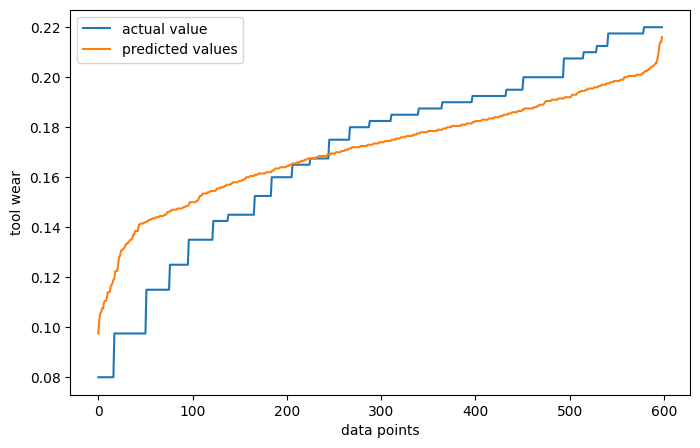

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing all statistical features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=9)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
y_pred_dt.shape

(599,)

In [ ]:
y_test.shape

(599,)

In [ ]:
#checking performance of decision tree model on all statistical features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 5.688631173131894e-32
Mean absolute percentage error for DT model: 1.1326971391443078e-15
R2 score for DT model: 1.0


In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
graph

,Actual,Predict
40,0.08,0.08
13,0.08,0.08
98,0.08,0.08
12,0.08,0.08
75,0.08,0.08
...,...,...
2954,0.22,0.22
2973,0.22,0.22
2935,0.22,0.22
2959,0.22,0.22


In [ ]:
graph.shape

(599, 2)

In [ ]:
size=np.arange(0,graph.shape[0],1)
size

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

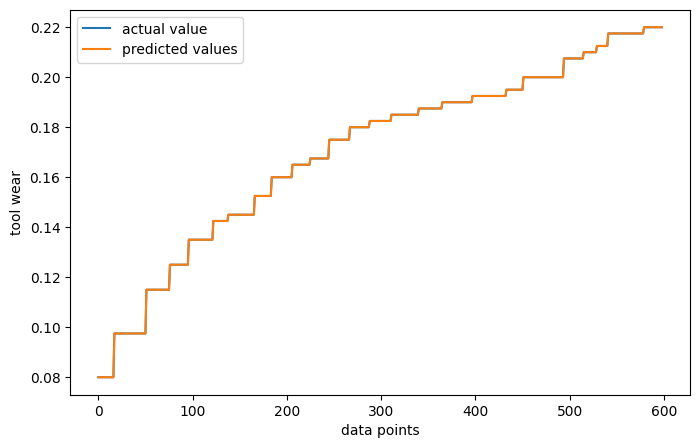

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict, label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#splitting selected statistical features data for training and testing
X = to_model.astype(float)
y = concatenated_df_statistical['Wear'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing selected statistical features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on selected statistical features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0008017616861435726
Mean absolute percentage error for KNN model: 0.1371585930500479
R2 score for KNN model: 0.43663710821709


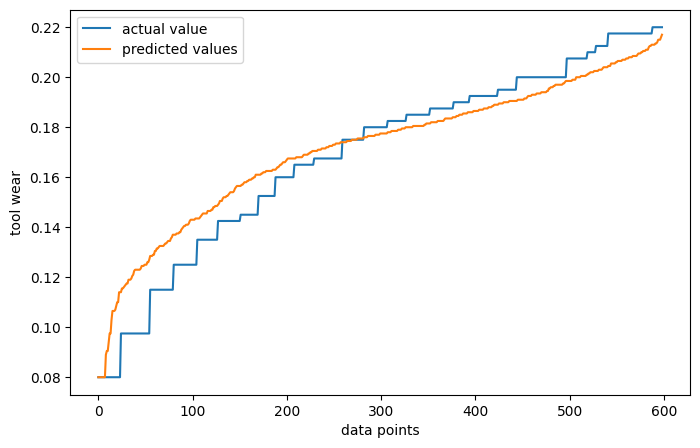

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing selected statistical features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=900)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on selected statistical features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0003027754590984975
Mean absolute percentage error for DT model: 0.07172924437494373
R2 score for DT model: 0.7872529192320583


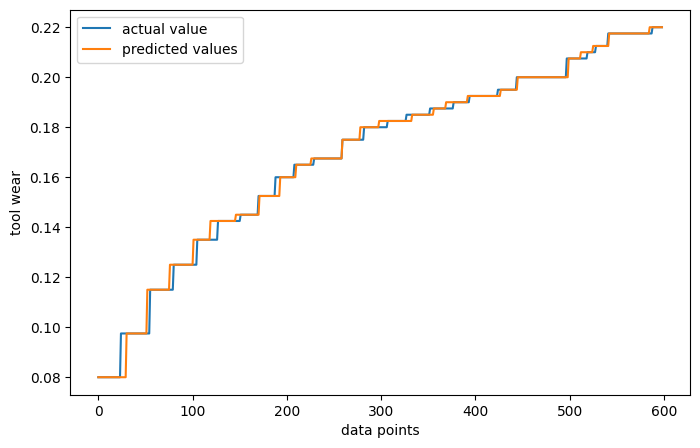

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing selected statistical features to random forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
#checking performance of random forest model on selected statistical features

mse_rf = mean_squared_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_dt)

print("Mean squared error for RF model:", mse_rf)
print("Mean absolute percentage error for RF model:", mape_rf)
print("R2 score for RF model:", r2_rf)

Mean squared error for RF model: 0.0003099958263772955
Mean absolute percentage error for RF model: 0.07118815885096455
R2 score for RF model: 0.782179482748103


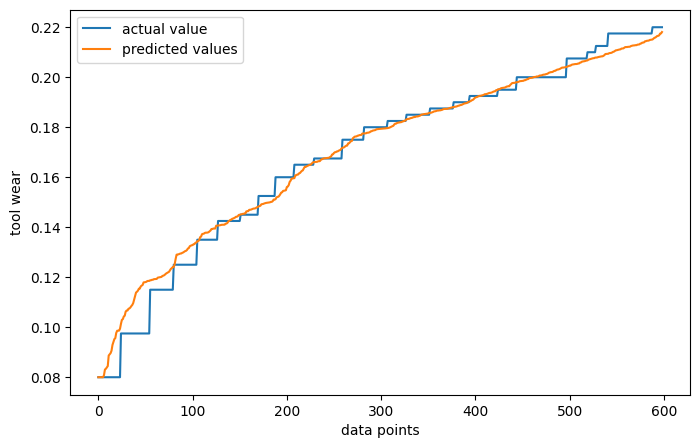

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#splitting scaled selected statistical features data for training and testing
from sklearn.model_selection import train_test_split
X = std_scaled.astype(float)
y = concatenated_df_statistical['Wear'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing scaled selected statistical features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on scaled selected statistical features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.00018395534223706174
Mean absolute percentage error for KNN model: 0.061392002530539336
R2 score for KNN model: 0.8707426217133701


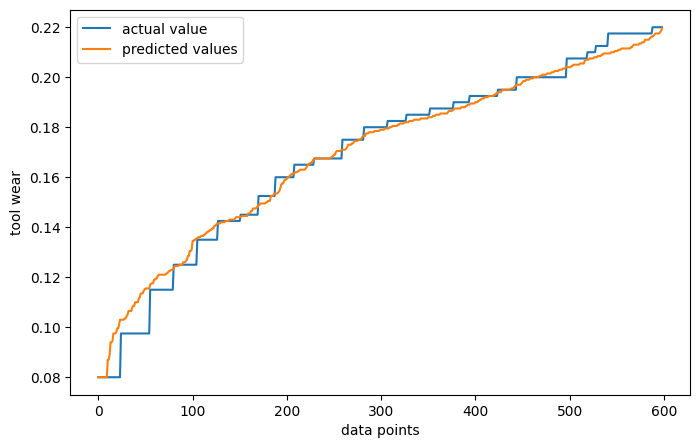

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing scaled selected statistical features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on scaled selected statistical features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0004448073629761097
Mean absolute percentage error for DT model: 0.10853626860688112
R2 score for DT model: 0.6874533086036261


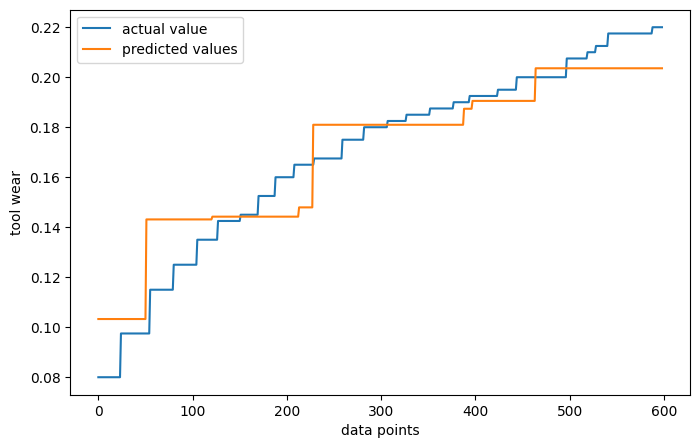

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing scaled selected statistical features to random forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
#checking performance of random forest model on scaled selected statistical features

mse_rf = mean_squared_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_dt)

print("Mean squared error for RF model:", mse_rf)
print("Mean absolute percentage error for RF model:", mape_rf)
print("R2 score for RF model:", r2_rf)

Mean squared error for RF model: 0.0004448073629761097
Mean absolute percentage error for RF model: 0.10853626860688112
R2 score for RF model: 0.6874533086036261


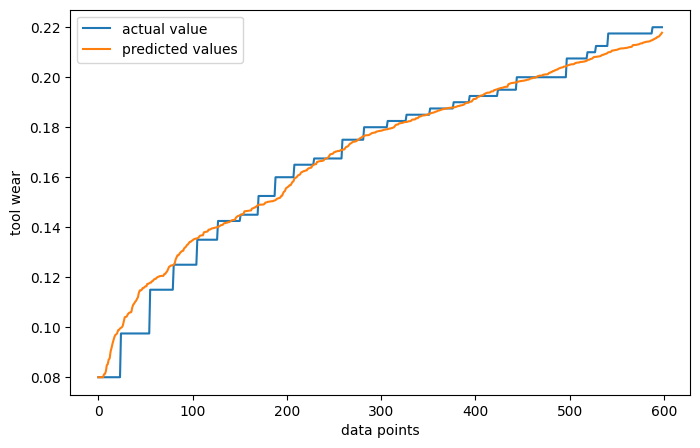

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()